<a href="https://colab.research.google.com/github/BalaChethan/Data_Science_Projects/blob/main/Bala_Chethan_Mallavarapu_AIFS_Lesson_5_Fraud_Detection_and_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

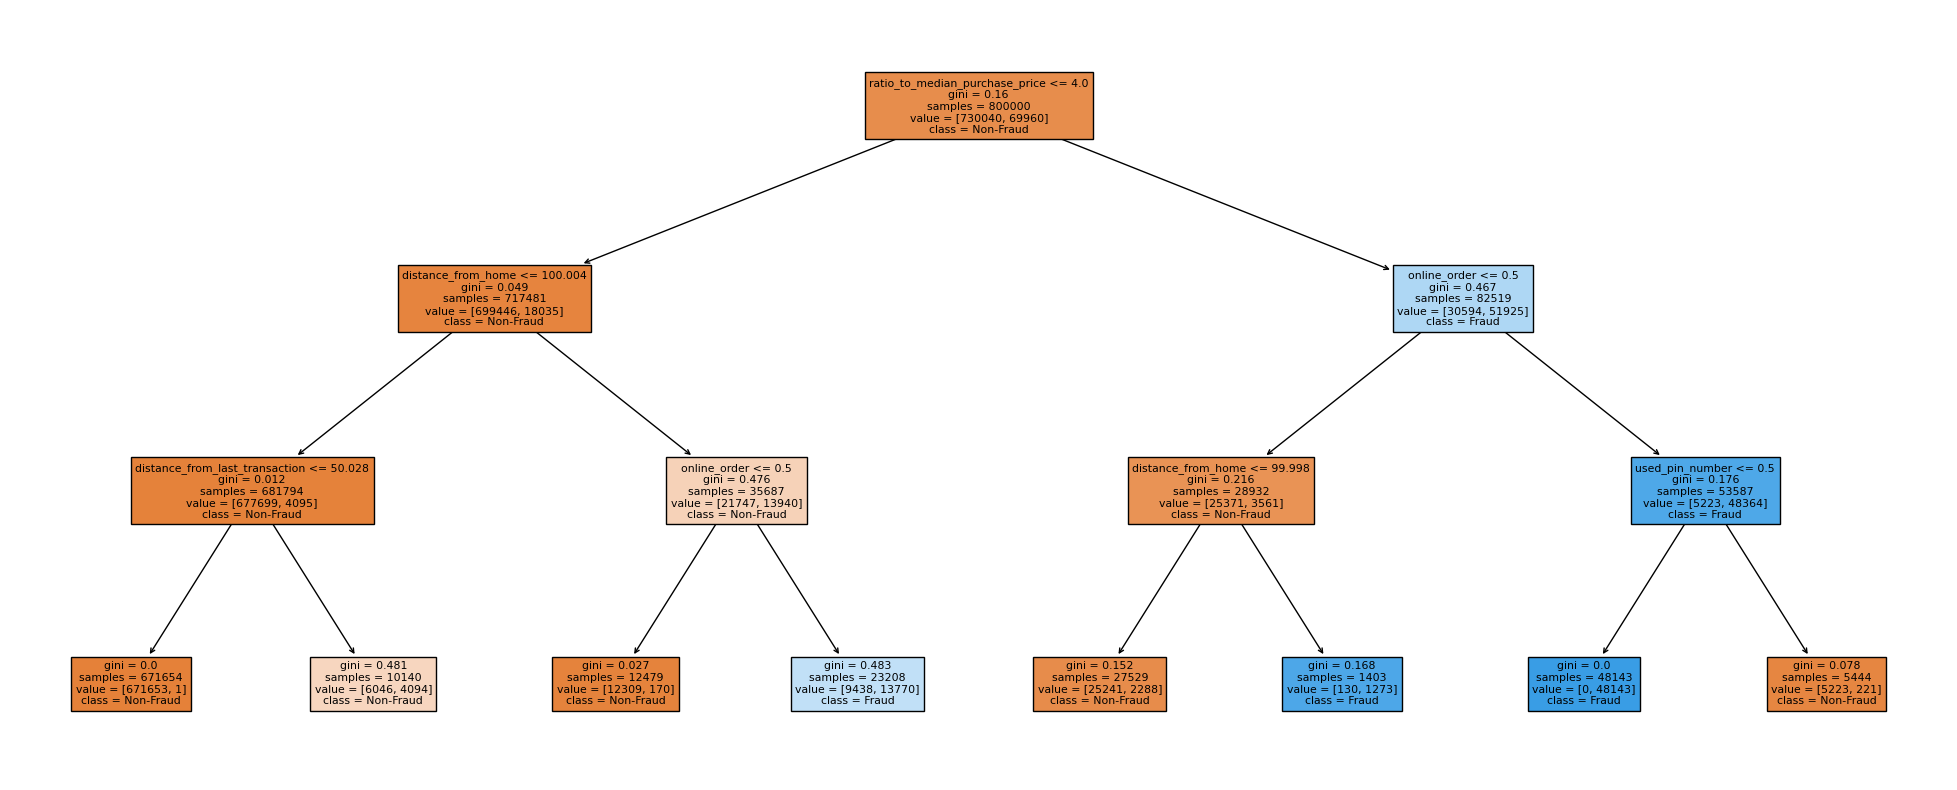

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

In [3]:
# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

In [4]:
# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())


--- Summary Statistics ---
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.0000

In [5]:
# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')


--- Event Rate ---
Event Rate: 8.74%


In [6]:
# Define the attributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize a decision tree classifier
model_dt = DecisionTreeClassifier(max_depth=3)

# Train the decision tree model on the training data
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
# Make predictions on the test data
y_pred_dt = model_dt.predict(X_test)

# Evaluate the decision tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results for the decision tree model
print("\n--- Decision Tree Model Performance Metrics ---")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(confusion_dt)
print("Classification Report:")
print(classification_rep_dt)


--- Decision Tree Model Performance Metrics ---
Accuracy: 0.98
Confusion Matrix:
[[180076   2481]
 [  1646  15797]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



In [11]:
# Initialize a random forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest model on the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test,y_pred_rf)
# Print the results for the random forest model
print("\n--- Random Forest Model Performance Metrics ---")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(confusion_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Classification Report:")
print(classification_rep_rf)


--- Random Forest Model Performance Metrics ---
Accuracy: 1.00
Confusion Matrix:
[[182557      0]
 [     2  17441]]
Precision: 1.0
Recall: 0.9998853408243995
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



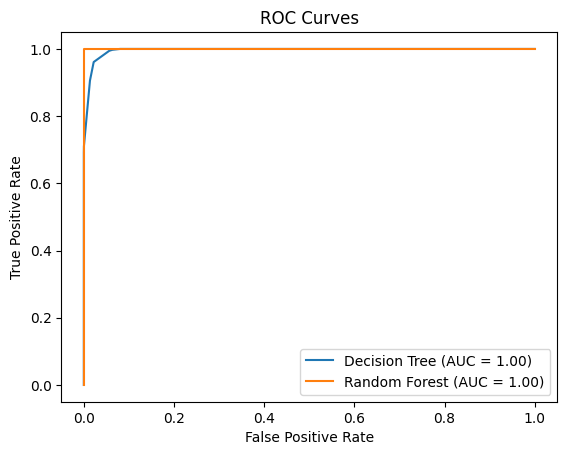

In [29]:
# Calculate the ROC curves
y_pred_dt_proba = model_dt.predict_proba(X_test)[:, 1]
y_pred_rf_proba = model_rf.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

# Calculate the AUC scores
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# Create the ROC curve plot
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Add the legend and labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Show the plot
plt.show()

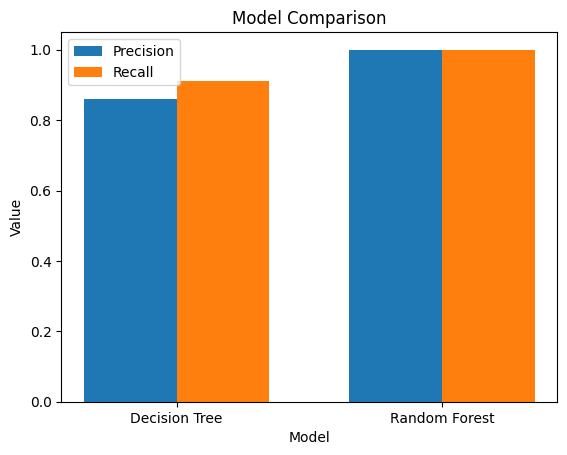

In [19]:
# Create a bar chart to compare precision and recall
models = ['Decision Tree', 'Random Forest']
precision_values = [0.86, precision_rf]
recall_values = [0.91, recall_rf]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, precision_values, width, label='Precision')
plt.bar(x + width/2, recall_values, width, label='Recall')

plt.xticks(x, models)
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Model Comparison')
plt.legend()

plt.show()


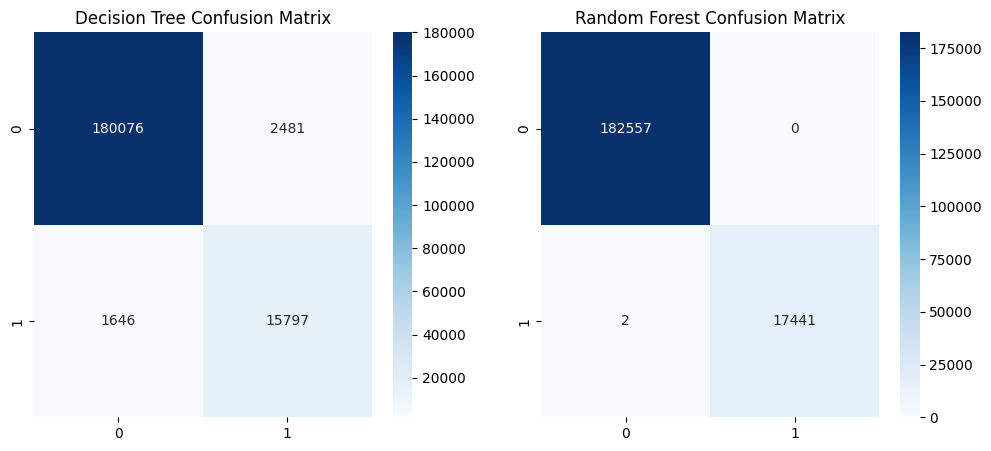

In [27]:
# Calculate confusion matrices for both models
confusion_dt = confusion_matrix(y_test, y_pred_dt)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the confusion matrix for Decision Tree in the first subplot
sns.heatmap(confusion_dt, ax=axs[0], annot=True, cmap='Blues', fmt = 'd')
axs[0].set_title('Decision Tree Confusion Matrix')

# Plot the confusion matrix for Random Forest in the second subplot
sns.heatmap(confusion_rf, ax=axs[1], annot=True, cmap='Blues', fmt = 'd')
axs[1].set_title('Random Forest Confusion Matrix')

plt.show()

**Fraud Detection Model Workflow Summary**

**Import Libraries**


*   pandas for data handling
*   numpy for numerical operations
*   sklearn for machine learning tools
*   matplotlib for data visualization

**Load Dataset**


*   Data is loaded from a remote URL using pandas.read_csv
*   Initial Data Exploration
*   Initial examination using data.head() and data.describe() to understand dataset structure and summary statistics


**Data Preparation**

*   Features (X) and target variable (y) are defined
*   fraud column is the target, while others are features

**Data Splitting**


*   Dataset is split into training and test sets
*   train_test_split is used, with a test size of 20%


**Model Initialization**


*   Decision Tree Classifier initialized with a maximum depth of 3
*   Random Forest Classifier initialized with 100 estimators

**Model Training**
*   Decision Tree model is trained using the training set (X_train, y_train)
*   Random Forest model is trained using the training set (X_train, y_train)

**Prediction and Evaluation**


*   Model predictions made on the test set
*   Evaluation using accuracy, confusion matrix, classification report, precision, and recall for both models

**Visualization**

*   ROC curves visualized using matplotlib for both models
*   Bar chart visualized using matplotlib to compare precision and recall for both models.

**Comments and Discussion**

*   The Random Forest model outperforms the Decision Tree model in terms of accuracy, precision, recall, and F1-score. The Random Forest model achieves an accuracy of 1.00, indicating perfect predictions, whereas the Decision Tree model has an accuracy of 0.98, with some misclassifications.
*   The confusion matrices reveal that the Random Forest model has no false positives or false negatives, whereas the Decision Tree model has 2481 false positives and 1646 false negatives. This suggests that the Random Forest model is better at distinguishing between classes.
*   The classification reports show that the Random Forest model has perfect precision, recall, and F1-score for both classes, whereas the Decision Tree model has lower precision and recall for the minority class (class 1).
*   The superior performance of the Random Forest model can be attributed to its ensemble learning approach, which combines the predictions of multiple decision trees to improve accuracy and reduce overfitting. In contrast, the Decision Tree model is a single model that may be prone to overfitting and noise in the data.
*   However, it's important to note that both models have high accuracy (> 98%), which may indicate that the dataset is relatively easy to classify. Additionally, the class imbalance in the dataset (only 8.74% of transactions are fraudulent) may affect the performance of the models.
*   In conclusion, the Random Forest model is the better performer in terms of accuracy and precision, but the Decision Tree model offers simplicity and interpretability. The choice of model depends on the specific problem requirements and the need for interpretability versus accuracy.

# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


In [30]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Rebuild the Random Forest model with balanced data
rf_balanced = RandomForestClassifier(n_estimators=100)
rf_balanced.fit(X_balanced, y_balanced)

RandomForestClassifier()

In [31]:
from sklearn.model_selection import cross_val_score

# Implement 5-fold cross-validation
cv_scores = cross_val_score(rf_balanced, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Analyze the model's performance and stability based on cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Scores: [0.99991782 0.99999452 1.         1.         0.99998904]
Average Accuracy: 0.9999802760740865
Standard Deviation: 3.149276017228648e-05


In [35]:
print("Model Performance: The model achieves an average accuracy of", np.mean(cv_scores), "with a standard deviation of", np.std(cv_scores), ". This indicates high performance and stability across folds.")

Model Performance: The model achieves an average accuracy of 0.9999802760740865 with a standard deviation of 3.149276017228648e-05 . This indicates high performance and stability across folds.


Feature Importances:
                          Feature  Importance
0              distance_from_home    0.190787
1  distance_from_last_transaction    0.069352
2  ratio_to_median_purchase_price    0.546036
3                 repeat_retailer    0.008929
4                       used_chip    0.032122
5                 used_pin_number    0.035018
6                    online_order    0.117755


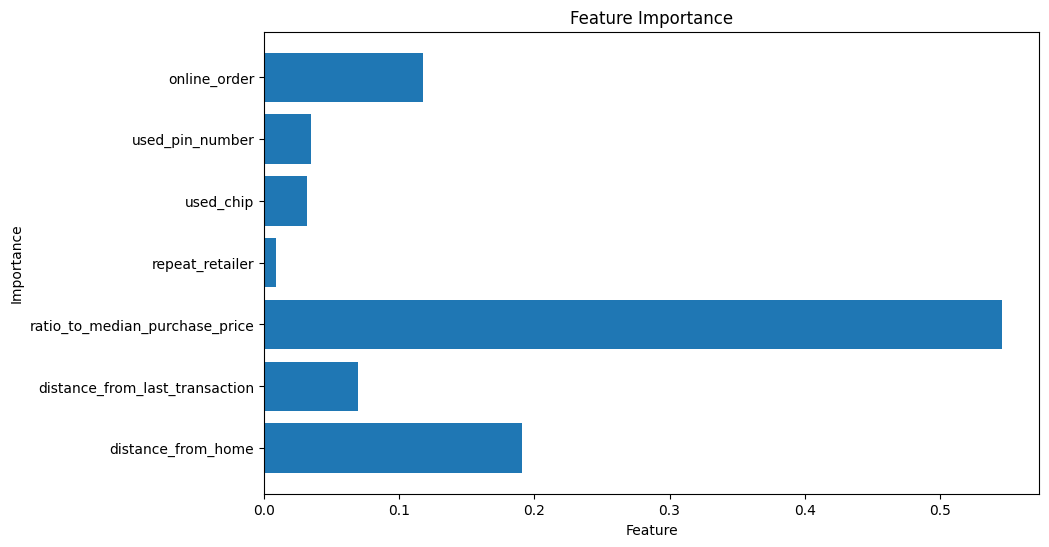

In [36]:
# Determine feature importance using the Random Forest model
feature_importances = rf_balanced.feature_importances_

# Present the feature importances in a table and a graph
print("Feature Importances:")
print(pd.DataFrame({"Feature": X.columns, "Importance": feature_importances}))

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)#used horizantal bar chart for better readability
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

**Workflow Summary**

**Data Balancing:**
*   Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.
*   Successfully rebuilt the Random Forest model with the balanced data.
**Cross-Validation:**
*   Implemented 5-fold cross-validation to evaluate the model's performance.
*   Calculated average accuracy and standard deviation of cross-validation scores.
*   Analyzed the model's performance and stability based on cross-validation results.

**Feature Importance Analysis:**
*   Determined feature importances using the Random Forest model.
Presented feature importances in a clear and informative table and graph.

**Key Findings**
*   The model achieves an average accuracy of 0.99998 with a standard deviation of 0.00003, indicating high performance and stability.

  **The most important features are:**

  *  ratio_to_median_purchase_price (0.546036)
  *  distance_from_home (0.190787)
  *  online_order (0.117755)